# EDA
Given the volume of data and limited amount of time. I wanted to minimize the time spent on inital eda and get to the modeling process as soon a possible. So that I could come back and do more exploration. My flow for this project was very circular. I'd model get a result, adjust features and try again. That being said my eda helped me explore keyword densities between subs.

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

# Loading my pickled df
After eda I created a separate notebook for cleaning and preparing my data for modeling. 

In [2]:
combined = pd.read_pickle('./data/combined.pkl')


In [4]:
y = list(combined['subreddit'])

# Running my dataframes through a count vec
I played around with different min and max df values. With no threshold for either I introduced a ton of noise. Interestingly enough that yielded 
characters in both russian and chinese. With the min and max values set at the thresholds below you get a funny bit of irony. The top words for Libertarian are the phrase people don't like government. Similairly the
LSC words read something close to people don't like work. With a different values like a min df of 20% the documents exposed more of the colorful words although the appear less frequently. This setting might be nice for tuning the models on what normal conversations on these subs are like.
Ulimately I used a combination of Gridsearch CV and manual tuning of hyperparameters to determine the best max and min and other parameters for each models. In general the more features included the better the accuracy for each model. 

In [26]:
cvec = CountVectorizer(stop_words='english', min_df=.009, max_df=1.0)

In [27]:
term_mat = cvec.fit_transform(combined.body)

In [28]:
term_df = pd.DataFrame(term_mat.toarray(), columns = cvec.get_feature_names())

In [29]:
term_df.shape

(381803, 252)

In [30]:
term_df

,able,absolutely,actual,actually,afford,agree,america,american,anti,aren,...,works,world,worse,worth,wouldn,wrong,yeah,year,years,yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
term_df['target_y'] = y


In [32]:
term_sums = term_df.groupby('target_y').sum()

# Plotting word freq by Libertarian

<Figure size 432x288 with 0 Axes>

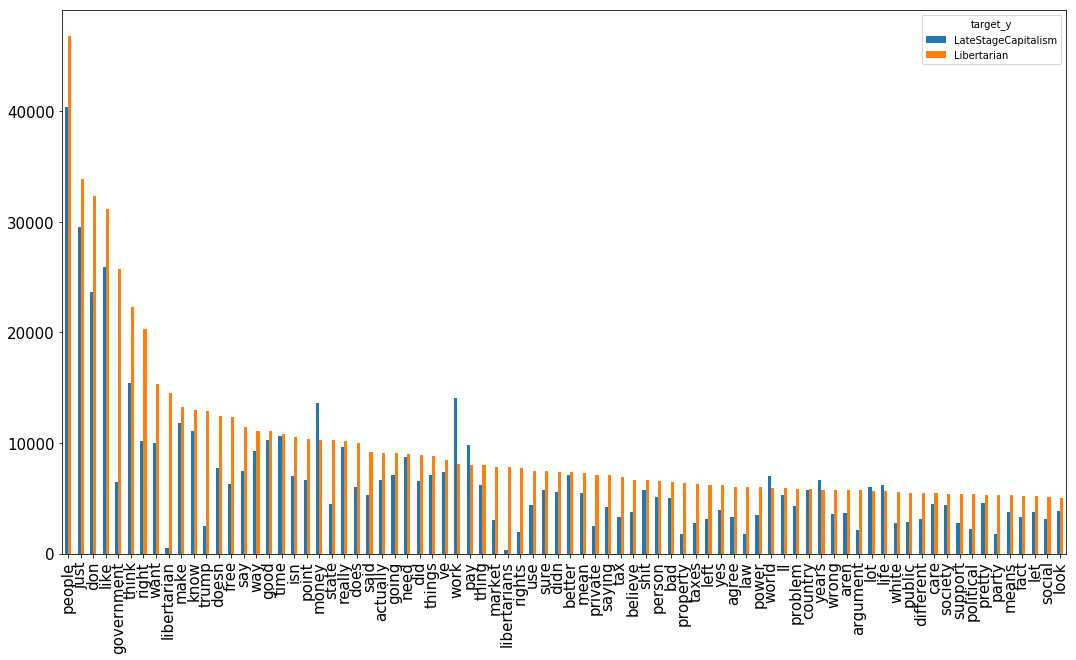

In [33]:
plt.figure()
term_sums.T.sort_values('Libertarian', ascending=False).head(80).plot(kind='bar',figsize=(18,10),fontsize=15)


# Plotting word freq by Lsc

<Figure size 432x288 with 0 Axes>

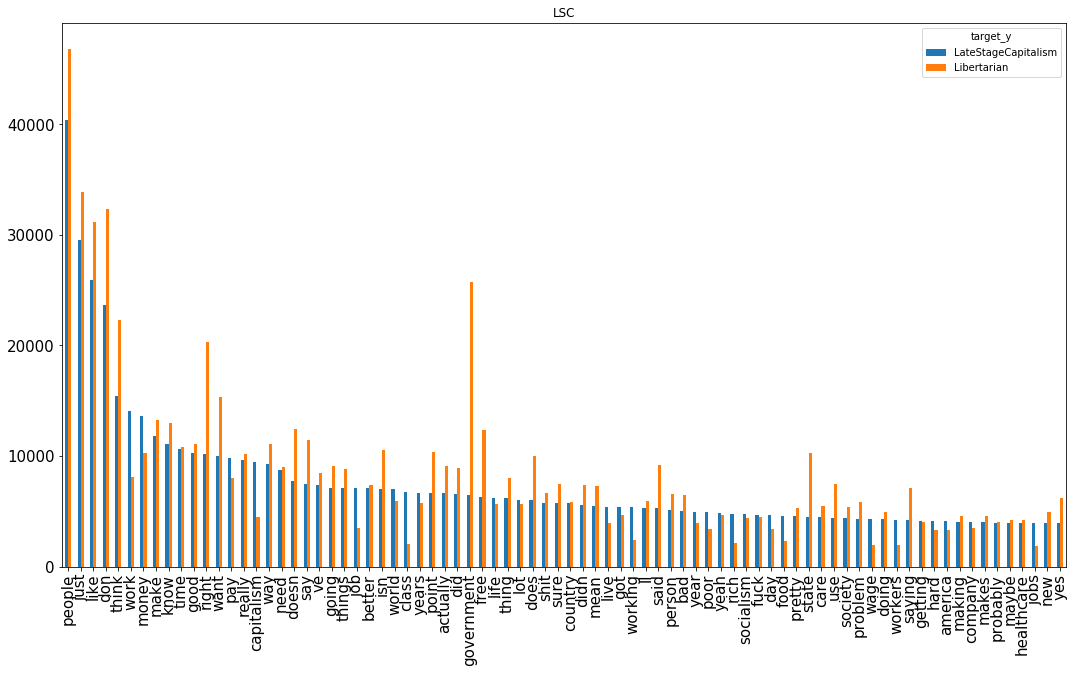

In [34]:
plt.figure()
term_sums.T.sort_values('LateStageCapitalism', ascending=False).head(80).plot(kind='bar',figsize=(18,10),fontsize=15,title="LSC")


In [35]:
term_df.groupby('target_y').mean()

,able,absolutely,actual,actually,afford,agree,america,american,anti,aren,...,works,world,worse,worth,wouldn,wrong,yeah,year,years,yes
target_y,,,,,,,,,,,,,,,,,,,,,
LateStageCapitalism,0.017166,0.008862,0.008696,0.036789,0.016097,0.018084,0.022657,0.019491,0.010600,0.020083,...,0.012150,0.038666,0.009637,0.013595,0.016922,0.019812,0.026997,0.027296,0.036927,0.021622
Libertarian,0.017216,0.011136,0.014089,0.045424,0.006155,0.030077,0.016311,0.016361,0.017877,0.028407,...,0.010783,0.029649,0.010539,0.008586,0.020065,0.028630,0.023336,0.019453,0.028779,0.030634


# Exploring the mean of word counts

In [17]:
term_df.groupby('target_y').mean().T.sort_values('Libertarian', ascending=False).head(20)

target_y,LateStageCapitalism,Libertarian
people,0.223607,0.232850
just,0.163718,0.168465
don,0.130909,0.160919
like,0.143342,0.155068
government,0.035765,0.127839
think,0.085197,0.110683
right,0.056246,0.101103
want,0.055189,0.076435
libertarian,0.002674,0.072021
make,0.065297,0.066040


In [18]:
term_df.groupby('target_y').mean().T.sort_values('LateStageCapitalism', ascending=False).head(20)

target_y,LateStageCapitalism,Libertarian
people,0.223607,0.232850
just,0.163718,0.168465
like,0.143342,0.155068
don,0.130909,0.160919
think,0.085197,0.110683
work,0.077890,0.040303
money,0.075211,0.051106
make,0.065297,0.066040
know,0.061256,0.064698
time,0.058820,0.053557
